# K Means Clustering
For this notebook, we'll use K Means clustering to categorize terrorist groups on how dangerous they are. We'll categorize by three different clusters, High, Medium and Low. We determine the danger levels by measuring property value damage and the total victims harmed and wounded. 

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Our data
df = pd.read_csv('../data/data.csv', encoding="latin-1")

### Victims Harmed
An important data point for understanding the lethality of a terrorist group, is understanding how many victims are harmed and wounded as a result of the attack. 
To get these values, we'll take the number of victims killed and wounded on a monthly basis. A yearly basis leads to less X values which we lead to less data points for clustering. 

In [12]:
def harmed_monthly(year, month):
    yearly = df[df['iyear'] == year]
    monthly = yearly[yearly['imonth'] == month]
    killed = monthly ["nkill"].sum()
    wounded = monthly["nwound"].sum()
    return killed + wounded

### Property value damage
Another data point for understanding lethality, is how much property was damaged as a result of the attack. Values are also being retrieved on a monthly basis to avoid lack of data points.

In [13]:
def prop_value_monthly(year, month):
    yearly = df[df['iyear'] == year]
    monthly = yearly[yearly['imonth'] == month]
    prop_value = monthly['propvalue'].sum()
    #print("Property Damage {} : {} : {} ".format(year, month, prop_value))
    return prop_value

### Inputting our data

In [14]:
X = []  
y = []

for i in range(1970, 2017):
    for j in range(1, 13):
        results = prop_value_monthly(i, j)
        harmed = harmed_monthly(i, j)
        # filtered out negative values (Don't know why that happened)
        if results > 0:
            y.append(results)

        if harmed > 0:
            X.append(harmed)

In [15]:
X = X[1:450] # Take a sample of 300 (Max is 465)
y = y[1:450]

In [16]:
data = {}
data['harmed'] = X
data['property_value'] = y

my_data = pd.DataFrame(data, columns=['harmed', 'property_value'])
kmeans = KMeans(n_clusters=3).fit(my_data)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.98934831e+02 6.53368104e+06]
 [2.79500000e+03 2.70366192e+09]
 [1.40900000e+03 7.67968468e+08]]


# Final result
Clusters represent severity level of terrorist groups. Sorted into clusters by low, medium and high severity. 

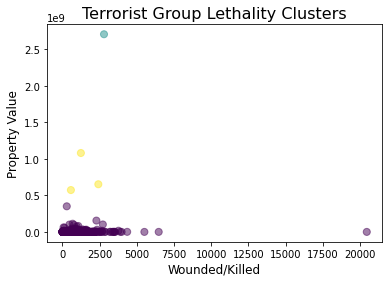

In [17]:
plt.title('Terrorist Group Lethality Clusters', fontsize=16)
plt.xlabel('Wounded/Killed', fontsize=12)
plt.ylabel('Property Value', fontsize=12)
plt.scatter(my_data['harmed'], my_data['property_value'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

In [ ]:
# ROC Curve Optimal threshold